In [40]:
import postgresql
import pandas
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## 1. Create a DataFrame with the Census Data from HW2

Find two examples in the course content in Blackboard  
Database Details:   
user='new_haven_ds_read'  
password='new_haven_ds_secret_99'  
host='spring-22.cwroivw0q1rc.us-east-1.rds.amazonaws.com'  
database='nhds'  
  
  
 SQL: sql = 'select * from nhds.uci_adults'

In [41]:
import postgresql

#db = postgresql.open("pq://new_haven_ds_read:new_haven_ds_secret_99@spring-22.cwroivw0q1rc.us-east-1.rds.amazonaws.com/nhds")
db = postgresql.open("pq://new_haven_ds_read:new_haven_ds_secret_99@spring-22.cwroivw0q1rc.us-east-1.rds.amazonaws.com/nhds")

In [42]:
# Let's create our SQL.....this is just a string
sql = 'select * from nhds.uci_adults'

# This is a prepared statement
ps = db.prepare(sql)

# Get results back and store in res variable
res = ps()

In [43]:
# making pandas dataframe
import pandas as pd
# Let's make it a DataFrame
df = pd.DataFrame(res, columns=ps.column_names)

In [44]:
df.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,id
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,3
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,4
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,5


In [45]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational_num     int64
marital_status     object
occupation         object
relationship       object
race               object
gender             object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
id                  int64
dtype: object

## 2. Split the data into training and testing sets

In [34]:
# avoiding IDs
#X = df.iloc[:, :-2]
#y = df.iloc[:,-2]

In [35]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

## 3. Use sklearn's LabelEncoder to make the columns with strings usuable

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
# LabelEncoder
le = LabelEncoder()

In [48]:
df_encoded = df.apply(le.fit_transform)

In [52]:
df_encoded

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,id
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0,1
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0,2
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0,3
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,4,0,0,0,37,39,0,32556
32557,23,4,8080,11,8,2,7,0,4,1,0,0,39,39,1,32557
32558,41,4,7883,11,8,6,1,4,4,0,0,0,39,39,0,32558
32559,5,4,12881,11,8,4,1,3,4,1,0,0,19,39,0,32559


In [53]:
X = df_encoded.iloc[:, :-2]
y = df_encoded.iloc[:,-2]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

## 4. Create a Decision Tree with the Census Data

In [23]:
# decision tree code here

In [71]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

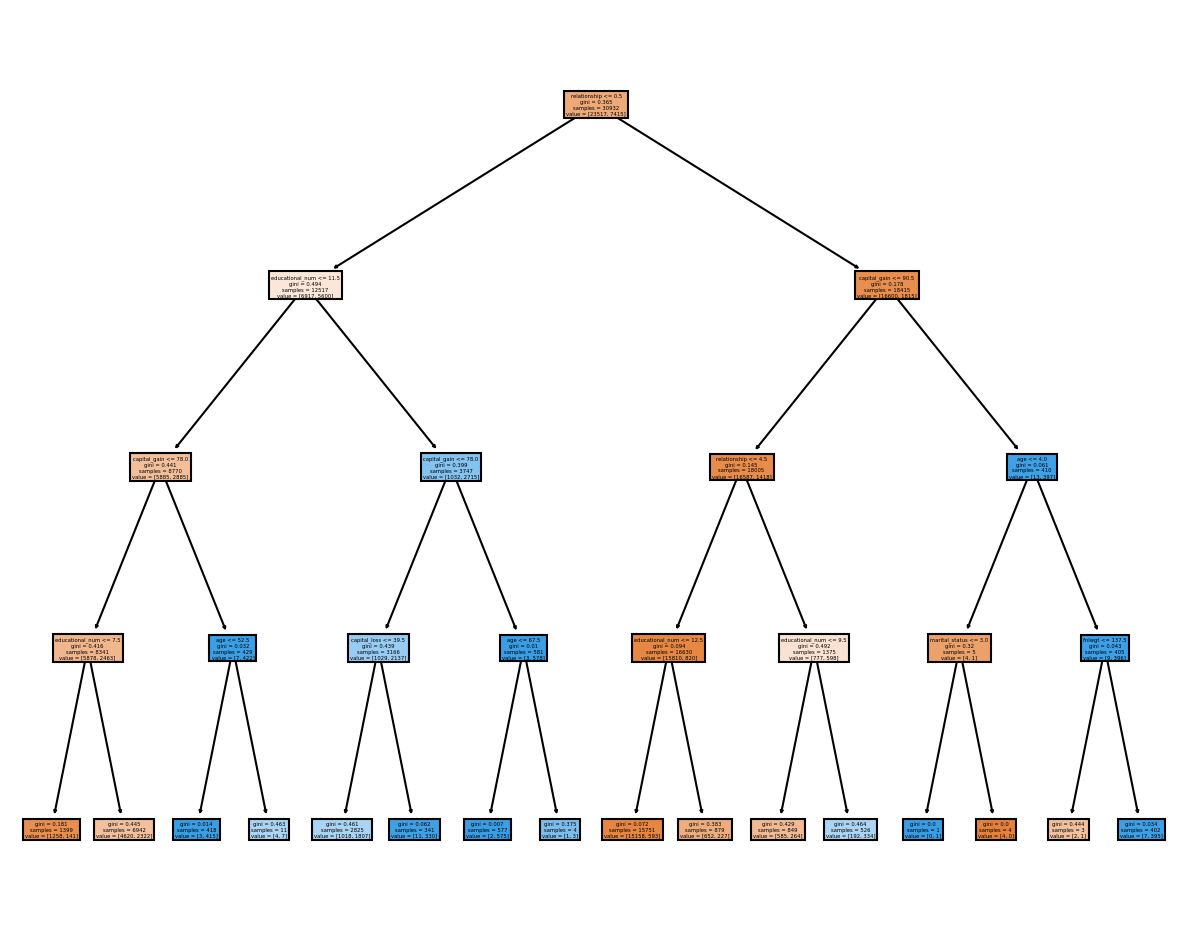

In [72]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns, filled=True);

## 5. Create a Random Forest with the same Census Data

In [59]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [62]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
print(predictions)

[0.03  0.051 0.158 ... 0.    0.15  0.377]


# 6. Compare the Accuracy of the Random Forest and the base Decision Tree.  Which is Better?  Why?

In [67]:
# Using Decision Tree
score = model.score(X_test, y_test)
score

0.810926949048496

In [70]:
# Using Random Forest
score_rf = rf.score(X_test, y_test)
score_rf

0.44596617863571697

In [ ]:
# It seems that accuracy of decision tree ,81%, is much better than accuracy of random forest, 45%. The reson behind it is 
#A decision tree is built on an entire dataset, using all the features/variables 
#of interest, whereas a random forest randomly selects observations/rows and specific 
#variables to build multiple decision trees from and then averages the results